In [5]:
# https://github.com/tuongv-1736461
from google.colab import files
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


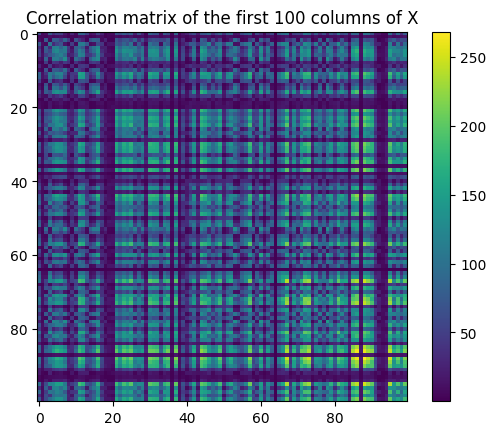

In [6]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

results=loadmat('yalefaces.mat')
X=results['X']

# Part a
# extract the first 100 columns of X
X_100 = X[:, :100]

# compute the correlation matrix
C = np.dot(X_100.T, X_100)

# plot the correlation matrix
plt.imshow(C)
plt.colorbar()
plt.title("Correlation matrix of the first 100 columns of X")
plt.show()


Location of maximum value in C_copy: (86, 88)
Location of minimum value in C_copy: (54, 64)


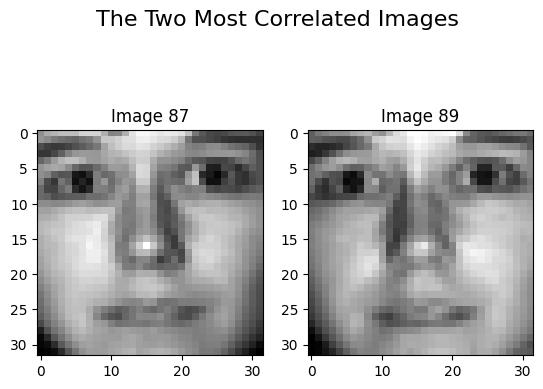

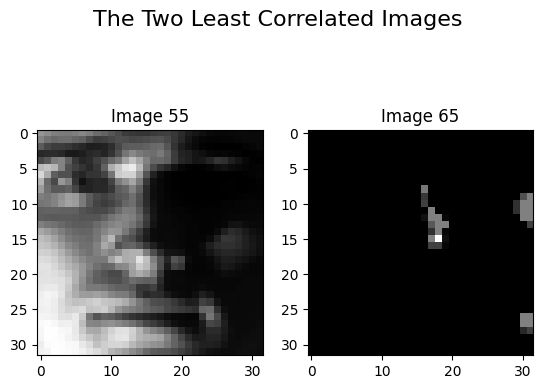

In [7]:
#Part b
# Create a copy of the correlation matrix C
C_copy = np.copy(C)

# Set the diagonal elements to 0
np.fill_diagonal(C_copy, 0)

# Find the location of the maximum value in the matrix
max_loc = np.unravel_index(np.argmax(C_copy), C_copy.shape)

print("Location of maximum value in C_copy:", max_loc)

# Fill the diagonal to a large number (1 million) 
np.fill_diagonal(C_copy, 1e6)

# Find the location of the minimum value in the matrix
min_loc = np.unravel_index(np.argmin(C_copy), C_copy.shape)

print("Location of minimum value in C_copy:", min_loc)

# Function that plot the image
def graph_img(i, j, string): 
    # Reshape images 1D array into a 2D array with dimensions 32x32
    img1 = X[:, i].reshape(32, 32)
    img2 = X[:, j].reshape(32, 32)    
    # Plot images
    fig, ax = plt.subplots(1, 2)
    fig.suptitle('The Two {} Correlated Images'.format(string), fontsize=16)
    ax[0].imshow(img1, cmap='gray')
    ax[0].set_title('Image %d' % (i+1))
    ax[1].imshow(img2, cmap='gray')
    ax[1].set_title('Image %d' % (j+1))
    plt.show()

# Plot the most and least correlated faces
graph_img(max_loc[0], max_loc[1], "Most")
graph_img(min_loc[0], min_loc[1], "Least")





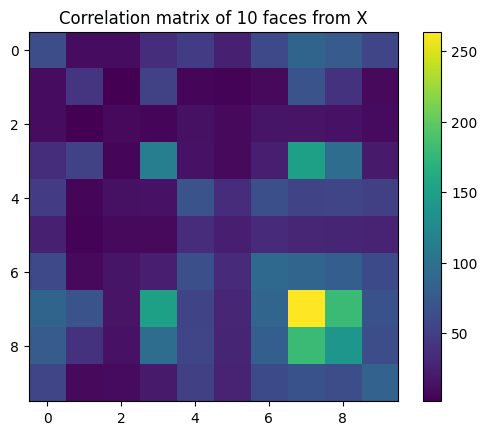

In [9]:
# Part c
# extract 10 columns of X
index_10 = [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005]
index_10 = [i-1 for i in index_10] # subtract 1 from each index to account for 0-indexing
X_10 = X[:, index_10]

# compute the correlation matrix
C_10 = np.dot(X_10.T, X_10)

# plot the correlation matrix
plt.imshow(C_10)
plt.colorbar()
plt.title("Correlation matrix of 10 faces from X")
plt.show()

In [11]:
# Part d
# Compute matrix Y
Y = np.dot(X, X.T)

# compute the eigenvalue decomposition of Y
eigenvalues, eigenvectors = np.linalg.eigh(Y)

# sort eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

print("The first six eigenvectors with the largest magnitude eigenvalue:")
print(eigenvectors[:,:6])

# Part e
U, S, V = np.linalg.svd(X)
# print the resulting matrices
print("The first six principal component directions:")
print(U[:,:6])


The first six eigenvectors with the largest magnitude eigenvalue:
[[-0.02384327  0.04535378 -0.05653196  0.04441826 -0.03378603  0.02207542]
 [-0.02576146  0.04567536 -0.04709124  0.05057969 -0.01791442  0.03378819]
 [-0.02728448  0.04474528 -0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [-0.02082937 -0.03737158 -0.06455006 -0.01006919  0.06172201  0.03025485]
 [-0.0193902  -0.03557383 -0.06196898 -0.00355905  0.05796353  0.02850199]
 [-0.0166019  -0.02965746 -0.05241684  0.00040934  0.05757412  0.00941028]]
The first six principal component directions:
[[-0.02384327 -0.04535378 -0.05653196  0.04441826 -0.03378603  0.02207542]
 [-0.02576146 -0.04567536 -0.04709124  0.05057969 -0.01791442  0.03378819]
 [-0.02728448 -0.04474528 -0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [-0.02082937  0.03737158 -0.06455006 -0.01006919  0.06172201  0.03025485]
 [-0.0193902   0.03557383 -0.06196898 -0.00355905  0.05796353  0.02850199]
 [-0.0166019   0.02965746 -0.05241684  0.00040934  0

In [58]:
# Part f
# eigenvector v1 from part (d)
v1 = np.array(eigenvectors[:,0])

# SVD mode u1 from part (e)
u1 = np.array(U[:,0])

# compute the norm of the difference of their absolute values
diff_norm = np.linalg.norm(np.abs(v1) - np.abs(u1))
print("U1:")
print(u1)
print("V1:")
print(v1)
# print the result
print("Norm of difference:", diff_norm)

U1:
[-0.02384327 -0.02576146 -0.02728448 ... -0.02082937 -0.0193902
 -0.0166019 ]
V1:
[-0.02384327 -0.02576146 -0.02728448 ... -0.02082937 -0.0193902
 -0.0166019 ]
Norm of difference: 7.650346874731423e-16


Percentage of variance captured by the first 6 modes:
Mode 1: 72.93%
Mode 2: 15.28%
Mode 3: 2.57%
Mode 4: 1.88%
Mode 5: 0.64%
Mode 6: 0.59%
93.88533720519487


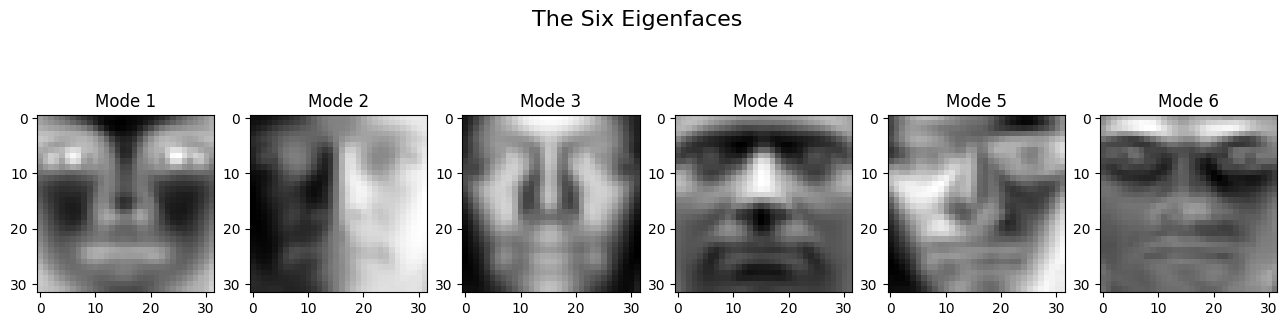

In [13]:
# Part g
# Compute the percentage of variance captured by the first 6 modes
n_modes = 6
variance_captured = [(S[i]**2 / np.sum(S**2)) * 100 for i in range(n_modes)]
print("Percentage of variance captured by the first %d modes:" % n_modes)
for i in range(n_modes):
   print("Mode %d: %.2f%%" % (i+1, variance_captured[i]))
print (np.sum(variance_captured))

# Reshape images 1D array into a 2D array with dimensions 32x32
# Plot images
fig, ax = plt.subplots(1, 6, figsize=(16, 4))
fig.suptitle('The Six Eigenfaces', fontsize=16)
for i in range(n_modes):
    img = U[:, i].reshape(32, 32)
    ax[i].imshow(img, cmap='gray')
    ax[i].set_title('Mode %d' % (i+1))
plt.show()
